In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Downloads/Car_Crash.csv")

In [3]:
df

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987,unavail,driver,0,4.0,2:13:02
1,1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994,nodeploy,driver,0,4.0,2:17:01
2,2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992,unavail,driver,0,4.0,0.138206019
3,3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992,unavail,pass,0,4.0,0.138206019
4,4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986,unavail,driver,0,4.0,4:58:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11212,11212,25-39,3179.688,survived,none,belted,1,m,17,2002,1985,unavail,driver,0,0.0,82:107:1
11213,11213,24-Oct,71.228,survived,airbag,belted,1,m,54,2002,2002,nodeploy,driver,0,2.0,82:108:2
11214,11214,24-Oct,10.474,survived,airbag,belted,1,f,27,2002,1990,deploy,driver,1,3.0,82:110:1
11215,11215,25-39,10.474,survived,airbag,belted,1,f,18,2002,1999,deploy,driver,1,0.0,82:110:2


In [4]:
df.shape

(11217, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   11217 non-null  int64  
 1   dvcat        11217 non-null  object 
 2   weight       11217 non-null  float64
 3   Survived     11217 non-null  object 
 4   airbag       11217 non-null  object 
 5   seatbelt     11217 non-null  object 
 6   frontal      11217 non-null  int64  
 7   sex          11217 non-null  object 
 8   ageOFocc     11217 non-null  int64  
 9   yearacc      11217 non-null  int64  
 10  yearVeh      11217 non-null  int64  
 11  abcat        11217 non-null  object 
 12  occRole      11217 non-null  object 
 13  deploy       11217 non-null  int64  
 14  injSeverity  11140 non-null  float64
 15  caseid       11217 non-null  object 
dtypes: float64(2), int64(6), object(8)
memory usage: 1.4+ MB


In [6]:
df.isnull().sum()

Unnamed: 0      0
dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
caseid          0
dtype: int64

In [7]:
#column injSeverity have null values.impute the null values with their mean value/median value.

In [8]:
df["injSeverity"].unique()

array([ 4.,  3.,  5.,  2.,  0.,  1., nan])

In [9]:
features=df.columns
def unique_check(df):
    unique=[]
    for i in features:
        uni=df[i].unique()   
        unique.append(uni)
        
    uni=pd.Series(unique)
    
    feat=pd.Series(features)
    
    unique=pd.concat([feat,uni],axis=1,keys=["Features","Unique"])  
    return unique   
unique_check(df)        

,Features,Unique
0,Unnamed: 0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,dvcat,"[55+, 25-39, 24-Oct, 40-54, 1-9km/h]"
2,weight,"[27.078, 89.627, 13.374, 12.383, 15.355, 29.65..."
3,Survived,"[Not_Survived, survived]"
4,airbag,"[none, airbag]"
5,seatbelt,"[none, belted]"
6,frontal,"[1, 0]"
7,sex,"[m, f]"
8,ageOFocc,"[32, 54, 67, 64, 23, 77, 34, 37, 33, 84, 87, 3..."
9,yearacc,"[1997, 1998, 1999, 2000, 2001, 2002]"


In [10]:
#check injSeverity column have any outliers before impute.

<Axes: >

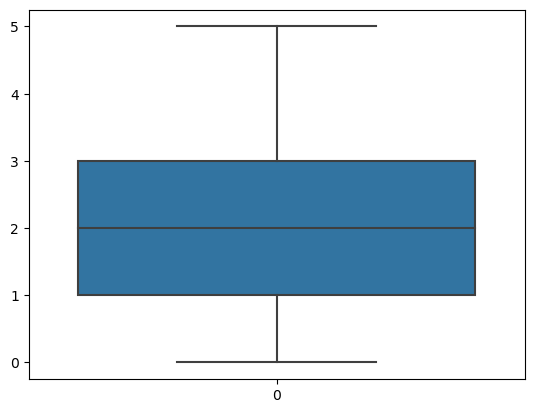

In [11]:
sns.boxplot(df["injSeverity"])

In [12]:
#column injSeverity does not have any outliers so impute mean value for null values.

In [13]:
df["injSeverity"].fillna(df["injSeverity"].mean(),inplace=True)

In [14]:
df.isnull().sum()

Unnamed: 0     0
dvcat          0
weight         0
Survived       0
airbag         0
seatbelt       0
frontal        0
sex            0
ageOFocc       0
yearacc        0
yearVeh        0
abcat          0
occRole        0
deploy         0
injSeverity    0
caseid         0
dtype: int64

In [15]:
#check the outliers for full dataset

<Axes: >

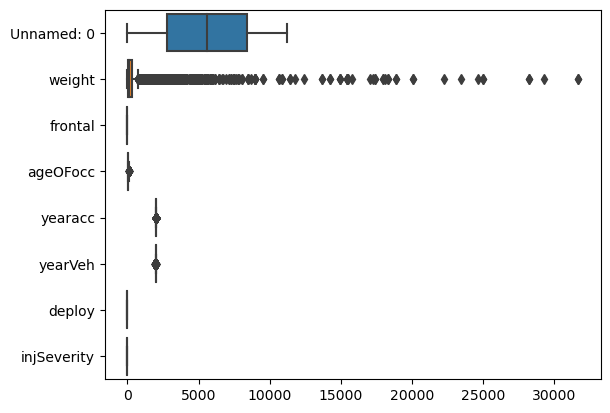

In [16]:
sns.boxplot(df,orient='h')

In [17]:
#column weight has outliers so treat the outliers with help of IQR method

In [18]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [19]:
outlier=["weight","ageOFocc"]

In [20]:
for i in outlier:
    lr,ur=remove_outlier(df[i])
    df[i]=np.where(df[i]>ur,ur,df[i])
    df[i]=np.where(df[i]<lr,lr,df[i])

<Axes: >

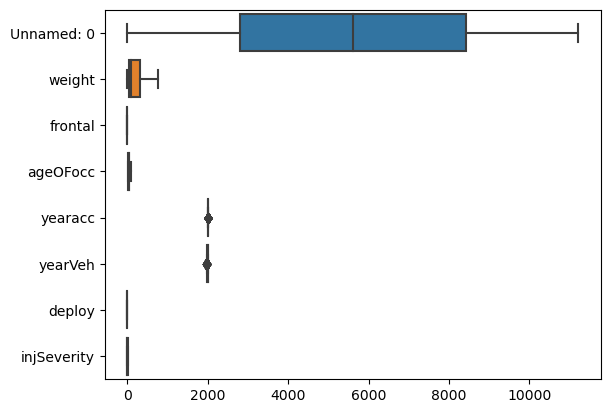

In [21]:
sns.boxplot(df,orient='h')

In [22]:
df.describe()

,Unnamed: 0,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity
count,11217.000000,11217.000000,11217.000000,11217.000000,11217.000000,11217.000000,11217.000000,11217.000000
mean,5608.000000,219.454706,0.644022,37.408220,2001.103236,1994.177944,0.389141,1.825583
std,3238.213319,261.963636,0.478830,18.136557,1.056805,5.658704,0.487577,1.373795
min,0.000000,0.000000,0.000000,16.000000,1997.000000,1953.000000,0.000000,0.000000
25%,2804.000000,28.292000,0.000000,22.000000,2001.000000,1991.000000,0.000000,1.000000
50%,5608.000000,82.195000,1.000000,33.000000,2001.000000,1995.000000,0.000000,2.000000
75%,8412.000000,324.056000,1.000000,48.000000,2002.000000,1999.000000,1.000000,3.000000
max,11216.000000,767.702000,1.000000,87.000000,2002.000000,2003.000000,1.000000,5.000000


In [23]:
#drop unnecessary columns from the dataset

In [24]:
df.columns

Index(['Unnamed: 0', 'dvcat', 'weight', 'Survived', 'airbag', 'seatbelt',
       'frontal', 'sex', 'ageOFocc', 'yearacc', 'yearVeh', 'abcat', 'occRole',
       'deploy', 'injSeverity', 'caseid'],
      dtype='object')

In [25]:
df.drop(["Unnamed: 0","yearacc","yearVeh","injSeverity","caseid"],axis=1,inplace=True)

In [26]:
df1=df.drop(["Survived"],axis=1)

In [27]:
df1

,dvcat,weight,airbag,seatbelt,frontal,sex,ageOFocc,abcat,occRole,deploy
0,55+,27.078,none,none,1,m,32.0,unavail,driver,0
1,25-39,89.627,airbag,belted,0,f,54.0,nodeploy,driver,0
2,55+,27.078,none,belted,1,m,67.0,unavail,driver,0
3,55+,27.078,none,belted,1,f,64.0,unavail,pass,0
4,55+,13.374,none,none,1,m,23.0,unavail,driver,0
...,...,...,...,...,...,...,...,...,...,...
11212,25-39,767.702,none,belted,1,m,17.0,unavail,driver,0
11213,24-Oct,71.228,airbag,belted,1,m,54.0,nodeploy,driver,0
11214,24-Oct,10.474,airbag,belted,1,f,27.0,deploy,driver,1
11215,25-39,10.474,airbag,belted,1,f,18.0,deploy,driver,1


# Encode the data (having string values) for Modeling (use pd.categorical or get_dummies).(0.5 Marks)

In [28]:
df_dummy=pd.get_dummies(df)

In [29]:
df_dummy


,weight,frontal,ageOFocc,deploy,dvcat_1-9km/h,dvcat_24-Oct,dvcat_25-39,dvcat_40-54,dvcat_55+,Survived_Not_Survived,...,airbag_none,seatbelt_belted,seatbelt_none,sex_f,sex_m,abcat_deploy,abcat_nodeploy,abcat_unavail,occRole_driver,occRole_pass
0,27.078,1,32.0,0,0,0,0,0,1,1,...,1,0,1,0,1,0,0,1,1,0
1,89.627,0,54.0,0,0,0,1,0,0,1,...,0,1,0,1,0,0,1,0,1,0
2,27.078,1,67.0,0,0,0,0,0,1,1,...,1,1,0,0,1,0,0,1,1,0
3,27.078,1,64.0,0,0,0,0,0,1,1,...,1,1,0,1,0,0,0,1,0,1
4,13.374,1,23.0,0,0,0,0,0,1,1,...,1,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11212,767.702,1,17.0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,0,1,1,0
11213,71.228,1,54.0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
11214,10.474,1,27.0,1,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
11215,10.474,1,18.0,1,0,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dvcat     11217 non-null  object 
 1   weight    11217 non-null  float64
 2   airbag    11217 non-null  object 
 3   seatbelt  11217 non-null  object 
 4   frontal   11217 non-null  int64  
 5   sex       11217 non-null  object 
 6   ageOFocc  11217 non-null  float64
 7   abcat     11217 non-null  object 
 8   occRole   11217 non-null  object 
 9   deploy    11217 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 876.5+ KB


In [31]:
df1["Survived"]=df["Survived"]

In [32]:
for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i]=pd.Categorical(df1[i]).codes

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dvcat     11217 non-null  int8   
 1   weight    11217 non-null  float64
 2   airbag    11217 non-null  int8   
 3   seatbelt  11217 non-null  int8   
 4   frontal   11217 non-null  int64  
 5   sex       11217 non-null  int8   
 6   ageOFocc  11217 non-null  float64
 7   abcat     11217 non-null  int8   
 8   occRole   11217 non-null  int8   
 9   deploy    11217 non-null  int64  
 10  Survived  11217 non-null  int8   
dtypes: float64(2), int64(2), int8(7)
memory usage: 427.3 KB


In [34]:
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from warnings import filterwarnings
filterwarnings("ignore")


# Data Split: Split the data into test and train.(size=0.30), random_state=1.(0.5 Marks)

In [35]:
x=df1.drop(["Survived"],axis=1)
y=df1["Survived"]

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [37]:
x_train.shape,x_test.shape

((7851, 10), (3366, 10))

In [38]:
y_train.shape,y_test.shape

((7851,), (3366,))

# Build classification model CART - Decision Tree.(1 Marks)

In [39]:
dc_model=DecisionTreeClassifier(criterion='gini',random_state=1)

In [40]:
dc_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [463]:
train_char_label = ['Not_Survived', 'Survived']
Car_Crash_file = open('Car_Crash.dot','w')
dot_data = tree.export_graphviz(dc_model, out_file=Car_Crash_file, feature_names = list(x_train), class_names = list(train_char_label))
Car_Crash_file.close()


In [41]:
print(pd.DataFrame(dc_model.feature_importances_,columns=['imp'],index=x_train.columns))

               imp
dvcat     0.203375
weight    0.388590
airbag    0.015236
seatbelt  0.046084
frontal   0.037185
sex       0.035188
ageOFocc  0.217312
abcat     0.025177
occRole   0.023929
deploy    0.007925


In [42]:
train_pred=dc_model.predict(x_train)

In [43]:
test_pred=dc_model.predict(x_test)

In [44]:
confusion_matrix(y_train,train_pred)

array([[ 797,    0],
       [   1, 7053]], dtype=int64)

In [45]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       797
           1       1.00      1.00      1.00      7054

    accuracy                           1.00      7851
   macro avg       1.00      1.00      1.00      7851
weighted avg       1.00      1.00      1.00      7851



In [46]:
confusion_matrix(y_test,test_pred)

array([[ 164,  219],
       [ 212, 2771]], dtype=int64)

In [47]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.44      0.43      0.43       383
           1       0.93      0.93      0.93      2983

    accuracy                           0.87      3366
   macro avg       0.68      0.68      0.68      3366
weighted avg       0.87      0.87      0.87      3366



In [48]:

print("AUC_Score: %.3f" % roc_auc_score(y_test,test_pred) )

AUC_Score: 0.679


AUC: 1.000


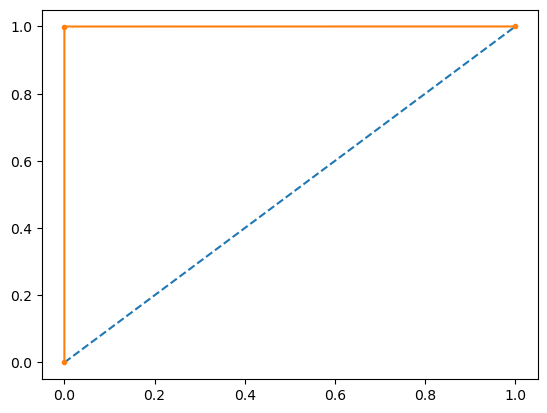

In [49]:
auc = roc_auc_score(y_train,train_pred)
print('AUC: %.3f' % auc)
# # calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,train_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.679


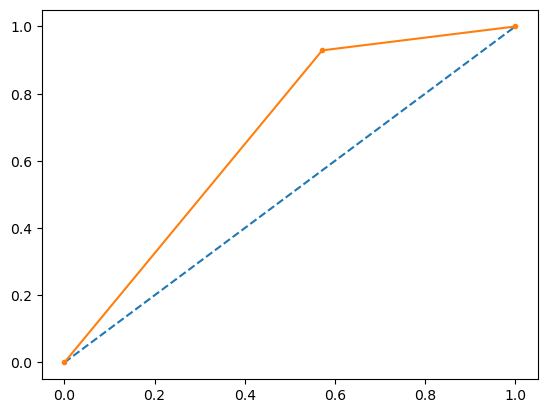

In [50]:
auc = roc_auc_score(y_test,test_pred)
print('AUC: %.3f' % auc)
# # calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,test_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Regularize the Decision Tree and Check the train and test score after regularization. (1 Marks)

In [51]:
params = {'criterion':['gini', 'entropy'],
         'max_depth':[5,6,7,9,10,11,13,15,16],
          'min_samples_split':list(range(1,20)),
         "min_samples_leaf":list(range(1,20))}

In [497]:
from sklearn.model_selection import GridSearchCV
grid_Dec = GridSearchCV(DecisionTreeClassifier(),param_grid=params,refit=True,verbose=1)
grid_Dec.fit(x_train, y_train)

Fitting 5 folds for each of 6498 candidates, totalling 32490 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 9, 10, 11, 13, 15, 16],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19]},
             verbose=1)

In [498]:
grid_Dec.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 11,
 'min_samples_split': 5}

In [52]:
reg_dc_model=DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_leaf=11,min_samples_split=5,random_state=1)

In [53]:
reg_dc_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=11,
                       min_samples_split=5, random_state=1)

In [54]:
train_char_label = ['Not_Survived', 'Survived']
Car_Crash_file = open('Car_Crash1.dot','w')
dot_data = tree.export_graphviz(reg_dc_model, out_file=Car_Crash_file, feature_names = list(x_train), class_names = list(train_char_label))
Car_Crash_file.close()


In [55]:
train_predict=reg_dc_model.predict(x_train)

In [56]:
test_predict=reg_dc_model.predict(x_test)

In [57]:
confusion_matrix(y_train,train_predict)

array([[ 300,  497],
       [ 133, 6921]], dtype=int64)

In [58]:
print(classification_report(y_train,train_predict))

              precision    recall  f1-score   support

           0       0.69      0.38      0.49       797
           1       0.93      0.98      0.96      7054

    accuracy                           0.92      7851
   macro avg       0.81      0.68      0.72      7851
weighted avg       0.91      0.92      0.91      7851



AUC: 0.679


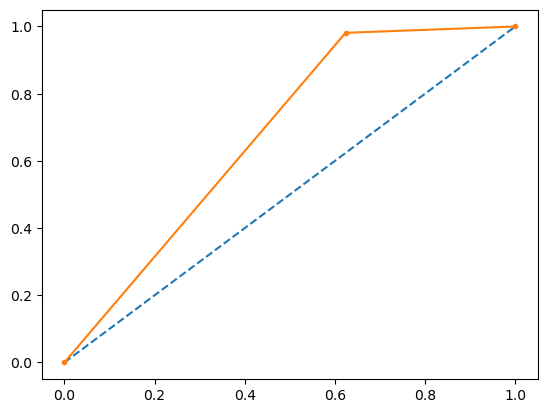

In [59]:
auc = roc_auc_score(y_train,train_predict)
print('AUC: %.3f' % auc)
# # calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [60]:
confusion_matrix(y_test,test_predict)

array([[ 133,  250],
       [  75, 2908]], dtype=int64)

In [61]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.64      0.35      0.45       383
           1       0.92      0.97      0.95      2983

    accuracy                           0.90      3366
   macro avg       0.78      0.66      0.70      3366
weighted avg       0.89      0.90      0.89      3366



AUC: 0.679


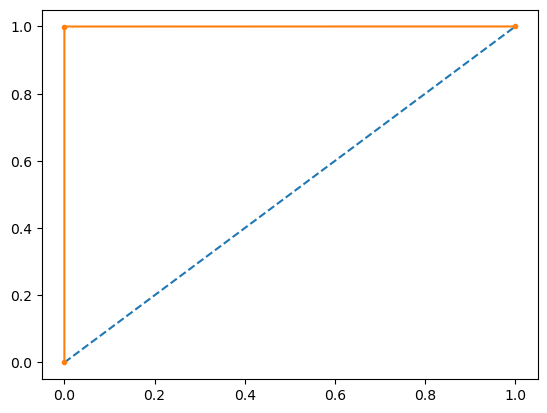

In [62]:
auc = roc_auc_score(y_test,test_pred)
print('AUC: %.3f' % auc)
# # calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,train_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Build ANN - Artificial Neural Network Model.(1 Marks)

In [63]:
sc=StandardScaler()


In [64]:
x_train = sc.fit_transform(x_train)

In [66]:
x_train

array([[ 0.28221081, -0.67507962,  1.29914516, ...,  1.16402835,
        -0.52768957, -0.79001317],
       [ 1.32781586, -0.52838572,  1.29914516, ...,  1.16402835,
         1.89505358, -0.79001317],
       [ 1.32781586, -0.77966361, -0.76973692, ..., -1.13590536,
        -0.52768957,  1.26580168],
       ...,
       [-0.76339424, -0.34929078, -0.76973692, ..., -1.13590536,
        -0.52768957,  1.26580168],
       [-0.76339424, -0.80808035, -0.76973692, ..., -1.13590536,
        -0.52768957,  1.26580168],
       [-0.76339424, -0.66583635,  1.29914516, ...,  1.16402835,
        -0.52768957, -0.79001317]])

In [65]:
x_test = sc.transform(x_test)

In [67]:
x_test 

array([[-0.76339424, -0.36762083,  1.29914516, ...,  1.16402835,
        -0.52768957, -0.79001317],
       [ 1.32781586, -0.54282307,  1.29914516, ...,  1.16402835,
        -0.52768957, -0.79001317],
       [-0.76339424,  2.05487408, -0.76973692, ...,  0.0140615 ,
        -0.52768957, -0.79001317],
       ...,
       [ 0.28221081, -0.75557464, -0.76973692, ...,  0.0140615 ,
        -0.52768957, -0.79001317],
       [-0.76339424, -0.19917359, -0.76973692, ...,  0.0140615 ,
        -0.52768957, -0.79001317],
       [ 1.32781586, -0.590253  ,  1.29914516, ...,  1.16402835,
         1.89505358, -0.79001317]])

In [68]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)

In [69]:
clf.fit(x_train,y_train)

Iteration 1, loss = 0.58003592
Iteration 2, loss = 0.43443926
Iteration 3, loss = 0.36993057
Iteration 4, loss = 0.33753502
Iteration 5, loss = 0.31777441
Iteration 6, loss = 0.30380363
Iteration 7, loss = 0.29311522
Iteration 8, loss = 0.28436639
Iteration 9, loss = 0.27707974
Iteration 10, loss = 0.27074535
Iteration 11, loss = 0.26520379
Iteration 12, loss = 0.26029546
Iteration 13, loss = 0.25595052
Iteration 14, loss = 0.25205081
Iteration 15, loss = 0.24854599
Iteration 16, loss = 0.24534908
Iteration 17, loss = 0.24244298
Iteration 18, loss = 0.23981369
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=21,
              solver='sgd', tol=0.01, verbose=True)

In [70]:
test_predict=clf.predict(x_test)

In [71]:
train_predict=clf.predict(x_train)

In [72]:
confusion_matrix(y_train,train_predict)

array([[  23,  774],
       [   8, 7046]], dtype=int64)

In [73]:
print(classification_report(y_train,train_predict))

              precision    recall  f1-score   support

           0       0.74      0.03      0.06       797
           1       0.90      1.00      0.95      7054

    accuracy                           0.90      7851
   macro avg       0.82      0.51      0.50      7851
weighted avg       0.88      0.90      0.86      7851



AUC: 0.514


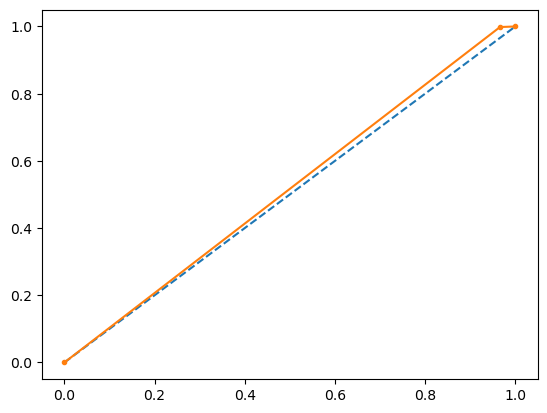

In [77]:
auc = roc_auc_score(y_train,train_predict)
print('AUC: %.3f' % auc)
# # calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [74]:
confusion_matrix(y_test,test_predict)

array([[  13,  370],
       [   5, 2978]], dtype=int64)

In [75]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.72      0.03      0.06       383
           1       0.89      1.00      0.94      2983

    accuracy                           0.89      3366
   macro avg       0.81      0.52      0.50      3366
weighted avg       0.87      0.89      0.84      3366



AUC: 0.516


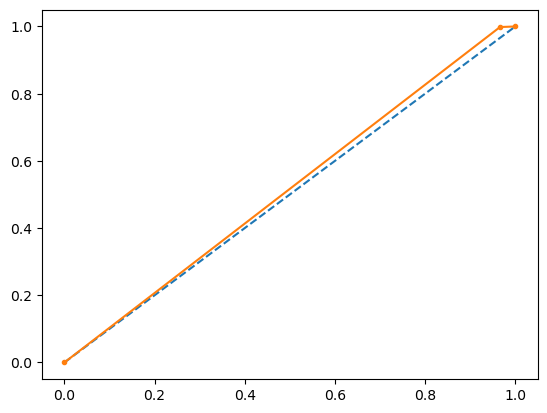

In [76]:
auc = roc_auc_score(y_test,test_predict)
print('AUC: %.3f' % auc)
# # calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [78]:
params = {'hidden_layer_sizes':[100,200,300,400],
         'max_iter':[1000,2000,3000,4000],
          'solver':['lbfgs', 'sgd', 'adam'],
         "activation":['identity', 'logistic', 'tanh', 'relu']}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_Dec = GridSearchCV(MLPClassifier(),param_grid=params,verbose=True)
grid_Dec.fit(x_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
